In [565]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
import igraph
from igraph import plot

In [566]:
#Parameters
N=1000
K=3
true_pi= np.array([0.2,0.5,0.3])
true_mu=np.array([[0,0],[1,2],[2,0]])
true_sigma= np.array([[[1.00, -0.25], [-0.25, 0.50]],[[0.50, 0.25],[0.25, 0.50]],[[0.50, -0.25],[ -0.25, 1]]])

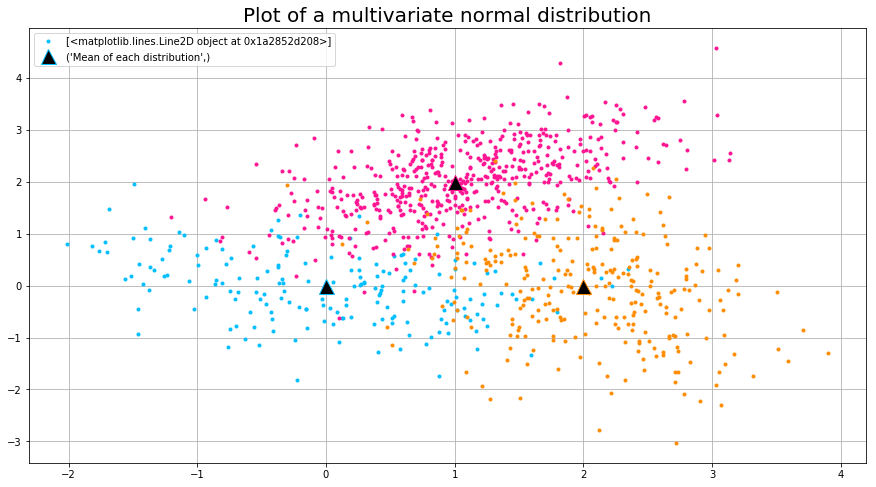

In [567]:
#Nb of values -n- in each distributions
list_N=np.random.multinomial(N, true_pi)

#list_x is a list of lists containing each distributions
list_x=[]
for i in range(K):
    list_x.append(np.random.multivariate_normal(true_mu[i], true_sigma[i], list_N[i]))
    
#X is the jointure of all the lists in x_list in one list 
X=np.vstack(list_x)

#First simple plot to see data
plt.figure(figsize=(15,8))
plt.grid()
color_list=["deepskyblue","deeppink","darkorange","forestgreen","blueviolet"] #funky color, because we like it

for i in range(K):
    x_plot = plt.plot(list_x[i][:,0],list_x[i][:,1],'.',color=color_list[i],label="Gaussienne n°%d"%i)
    mean_plot = plt.plot(true_mu[i,0],true_mu[i,1],'^k',markersize=15,mec = color_list[i])
    
plt.legend([(mean_plot),("Mean of each distribution",)])
plt.title("Plot of a multivariate normal distribution", fontsize="20")
plt.show()

In [568]:
def n_idx_closest_points(node,nodes,n):
    dist_2 = np.sum((nodes - node)**2, axis=1)
    l_idx_nodes = np.argsort(dist_2)[:n]
    #print(np.max(dist_2))
    return l_idx_nodes

def n_idx_closest_points_1(node,nodes):
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argwhere(dist_2 < np.quantile(dist_2,q=0.01)).flatten()

def n_idx_random_neighboor_walk(node,nodes,n):
    dist_2 = np.sum((nodes - node)**2, axis=1)
    path = np.random.choice(np.argsort(dist_2)[:n])
    return path


def pairs_for_edges(l_idx_nodes):
    l=[]
    for i in range(len(l_idx_nodes)):
        sublist=[]
        for j in range(1,len(l_idx_nodes[0])):
            sublist.append([l_idx_nodes[i][0],l_idx_nodes[i][j]])
        l.append(sublist)
    return l

def pairs_flatter(pairs_for_edges):
    return [el for sublist in pairs_for_edges for el in sublist]
    

In [642]:
#n_idx_closest_points_1(X[0],X)
#RANDOM WALK WITH NEIGHBOORS
size_path=10
neighboord_hood_size = 10
paths=[]
nb_iteration = 30

for i in range(nb_iteration):
    path=[]
    for j in range(size_path):
        x_init = np.random.choice(np.max(N-neighboord_hood_size,0),1)
        path.append(n_idx_random_walk(X[x_init],X,neighboord_hood_size))
    paths.append(path)

l=list(np.array(paths).flatten())
l=[str(el) for el in np.array(paths).flatten()]
g=terms_to_graph(l,3)


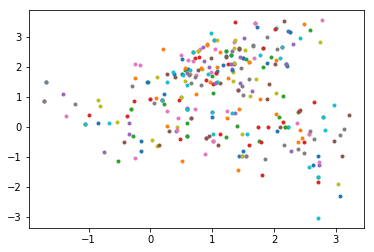

In [643]:
for i in range(np.shape(paths)[0]):
    plt.plot(X[paths[i]][:,0],X[paths[i]][:,1],'.')

plt.show()

In [629]:
#np.shape(paths)

In [630]:
#l_idx_nodes=n_idx_closest_points([-1.51647542,  0.67677891],X,5)
#plt.plot(X[l_idx_nodes][:,0], X[l_idx_nodes][:,1],'.')

In [631]:
#l_idx_nodes=[]
#Calcul des n nodes les plus pres de chacun des nodes
#for i in range(len(X)):
    #l_idx_nodes.append(n_idx_closest_points(X[i],X,5))
    #l_idx_nodes.append(n_idx_closest_points_1(X[i],X))

In [632]:
#g = igraph.Graph(directed=True)
#g = igraph.Graph()


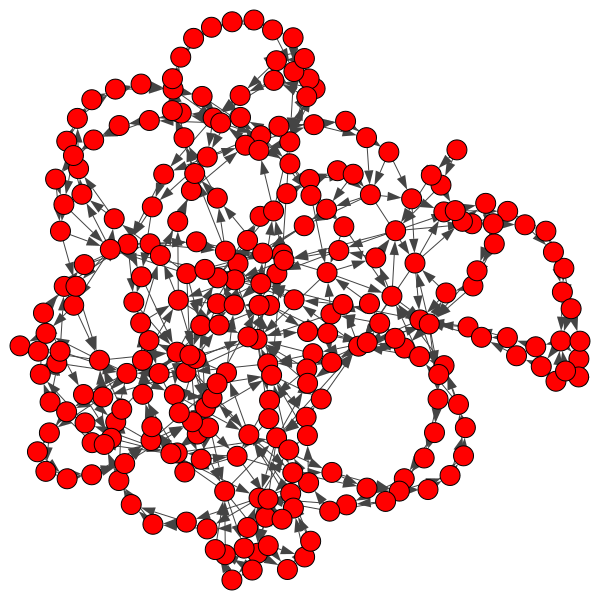

In [646]:
#g.add_vertices(N)
#g.add_edges(pairs_flatter(pairs_for_edges(l_idx_nodes)))
g= g.simplify()
plot(g)

In [638]:
np.sort(np.array(g.coreness()))[::-1]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2])

In [635]:
#np.argsort(g.coreness())[::-1]

In [636]:
#k_core = np.argsort(g.coreness(mode="OUT"))[:3]#[::-1]
#k_core = np.argwhere(np.array(g.coreness(mode="ALL"))>=np.max(np.array(g.coreness()))).flatten()
k_core = np.argsort(g.degree())[::-1][:10]
k_core


array([190, 173, 150, 129,  54,  76, 138,  27, 140,  56])

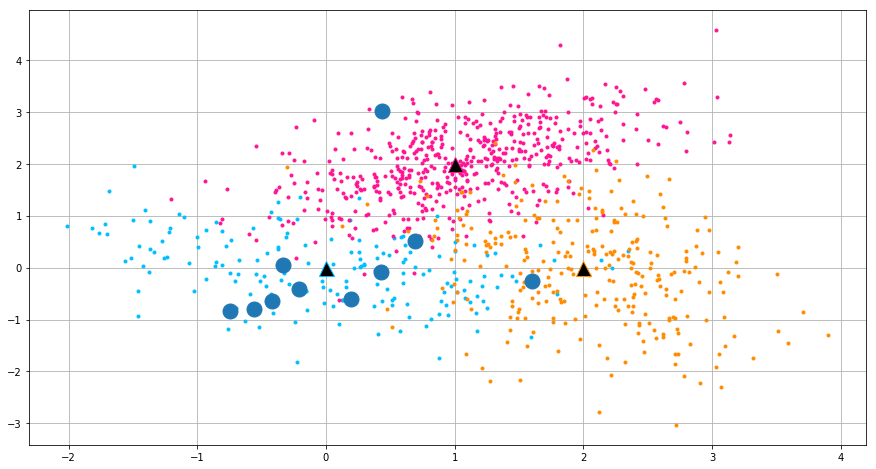

In [637]:
plt.figure(figsize=(15,8))
plt.grid()
color_list=["deepskyblue","deeppink","darkorange","forestgreen","blueviolet"] #funky color, because we like it

for i in range(K):
    x_plot = plt.plot(list_x[i][:,0],list_x[i][:,1],'.',color=color_list[i],label="Gaussienne n°%d"%i)
    mean_plot = plt.plot(true_mu[i,0],true_mu[i,1],'^k',markersize=15,mec = color_list[i])
plt.plot(X[k_core][:,0],X[k_core][:,1], 'o', markersize=15 )
"""
plt.plot(X[0][0],X[0][1], '^', markersize=15)
plt.plot(X[2][0],X[2][1], '^', markersize=15)
plt.plot(X[7][0],X[7][1], '^', markersize=15)
plt.plot(X[134][0],X[134][1], '^', markersize=15)
plt.plot(X[135][0],X[135][1], '^', markersize=15)
"""
plt.show()

In [580]:
n_idx_closest_points_1(X[0],X)

array([  0,  37,  62,  68,  87, 139, 154, 168, 820, 991])

In [641]:
import re 
import itertools
import operator
import copy
import igraph
import heapq
import nltk
# requires nltk 3.2.1
from nltk import pos_tag # nltk.download('maxent_treebank_pos_tagger')
def terms_to_graph(terms, window_size):

    from_to = {}

    w = min(window_size, len(terms))
    # create initial complete graph (first w terms)
    terms_temp = terms[0:w]
    indexes = list(itertools.combinations(range(w), r=2))

    new_edges = []

    for my_tuple in indexes:
        new_edges.append(tuple([terms_temp[i] for i in my_tuple]))
    for new_edge in new_edges:
        if new_edge in from_to:
            from_to[new_edge] += 1
        else:
            from_to[new_edge] = 1

    # then iterate over the remaining terms
    for i in range(w, len(terms)):
        # term to consider
        considered_term = terms[i]
        # all terms within sliding window
        terms_temp = terms[(i - w + 1):(i + 1)]

        # edges to try
        candidate_edges = []
        for p in range(w - 1):
            candidate_edges.append((terms_temp[p], considered_term))

        for try_edge in candidate_edges:

            # if not self-edge
            if try_edge[1] != try_edge[0]:

                # if edge has already been seen, update its weight
                if try_edge in from_to:
                    from_to[try_edge] += 1

                # if edge has never been seen, create it and assign it a unit weight
                else:
                    from_to[try_edge] = 1

    # create empty graph
    g = igraph.Graph(directed=True)

    # add vertices
    g.add_vertices(sorted(set(terms)))

    # add edges, direction is preserved since the graph is directed
    g.add_edges(list(from_to.keys()))

    # set edge and vertice weights
    g.es['weight'] = list(from_to.values()) # based on co-occurence within sliding window
    g.vs['weight'] = g.strength(weights=list(from_to.values())) # weighted degree

    return (g)

In [609]:
g.vs[543]

igraph.Vertex(<igraph.Graph object at 0x1a268f8c78>, 543, {'name': '588', 'weight': 384.0})

In [610]:
def core_dec(g,weighted):
    '''(un)weighted k-core decomposition'''
    # work on clone of g to preserve g 
    gg = copy.deepcopy(g)
    if not weighted:
        gg.vs['weight'] = gg.strength() # overwrite the 'weight' vertex attribute with the unweighted degrees
    # initialize dictionary that will contain the core numbers
    cores_g = dict(zip(gg.vs['name'],[0]*len(gg.vs)))
    
    while len(gg.vs) > 0:
        # find index of lowest degree vertex
        min_degree = min(gg.vs['weight'])
        index_top = gg.vs['weight'].index(min_degree)
        name_top = gg.vs[index_top]['name']
        # get names of its neighbors
        neighbors = gg.vs[gg.neighbors(index_top)]['name']
        # exclude self-edges
        neighbors = [elt for elt in neighbors if elt!=name_top]
        # set core number of lowest degree vertex as its degree
        cores_g[name_top] = min_degree
        # delete top vertex and its incident edges
        gg.delete_vertices(index_top)
        
        if neighbors:
            if weighted: 
                new_degrees = gg.strength(weights=gg.es['weight'])
            else:
                new_degrees = gg.strength()
            # iterate over neighbors of top element
            for neigh in neighbors:
                index_n = gg.vs['name'].index(neigh)
                gg.vs[index_n]['weight'] = max(min_degree,new_degrees[index_n])  
        
    return(cores_g)

In [644]:
core_dec(g,True)

{'0': 4.0,
 '1': 4.0,
 '10': 4.0,
 '102': 4.0,
 '107': 4.0,
 '108': 4.0,
 '110': 4.0,
 '112': 4.0,
 '114': 4.0,
 '118': 4.0,
 '120': 4.0,
 '125': 4.0,
 '130': 4.0,
 '131': 2.0,
 '136': 4.0,
 '142': 4.0,
 '148': 4.0,
 '150': 4.0,
 '153': 4.0,
 '164': 4.0,
 '166': 4.0,
 '17': 4.0,
 '170': 4.0,
 '172': 4.0,
 '173': 4.0,
 '175': 4.0,
 '194': 4.0,
 '198': 4.0,
 '210': 4.0,
 '213': 4.0,
 '22': 4.0,
 '222': 3.0,
 '225': 4.0,
 '226': 4.0,
 '227': 4.0,
 '229': 4.0,
 '231': 4.0,
 '241': 4.0,
 '244': 4.0,
 '257': 4.0,
 '259': 3.0,
 '260': 4.0,
 '261': 4.0,
 '262': 4.0,
 '264': 4.0,
 '266': 4.0,
 '267': 4.0,
 '269': 4.0,
 '273': 4.0,
 '275': 4.0,
 '277': 4.0,
 '28': 4.0,
 '280': 4.0,
 '283': 4.0,
 '287': 4.0,
 '288': 3.0,
 '291': 4.0,
 '292': 4.0,
 '296': 4.0,
 '302': 4.0,
 '308': 4.0,
 '310': 4.0,
 '326': 4.0,
 '328': 4.0,
 '330': 4.0,
 '333': 4.0,
 '335': 4.0,
 '337': 4.0,
 '340': 4.0,
 '344': 4.0,
 '345': 3.0,
 '352': 4.0,
 '356': 4.0,
 '357': 4.0,
 '370': 4.0,
 '380': 4.0,
 '388': 4.0,
 '392':

In [645]:
g.es["weight"]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
